In [2]:
import pandas as pd
import torch

In [3]:
df = pd.read_csv('통영.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22188,2015-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,0.0,NaN,8.0
1,22188,2015-11-18,13.8,1017.7,85.0,15.4,17.5,4.9,3.0,4.9,7.2,7.4,9.1
2,22188,2015-11-19,8.7,1021.9,77.0,15.4,17.4,3.3,2.0,3.7,6.2,8.1,9.1
3,22188,2015-11-20,3.0,1022.5,77.0,15.7,17.3,1.4,0.8,1.2,2.3,6.5,7.1
4,22188,2015-11-21,6.1,1025.1,79.0,16.1,17.3,1.1,0.7,0.8,1.4,4.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,22188,2022-12-27,5.3,1026.7,53.0,6.6,13.7,1.3,0.9,1.0,1.7,4.2,4.7
2525,22188,2022-12-28,7.8,1028.5,60.0,5.7,13.2,1.5,0.9,1.3,2.1,3.7,3.9
2526,22188,2022-12-29,5.7,1031.3,56.0,4.8,13.2,1.2,0.8,1.1,1.8,3.6,4.1
2527,22188,2022-12-30,7.4,1031.2,57.0,5.5,13.4,1.2,0.8,1.0,1.6,3.5,3.7


In [4]:
df = df.rename(columns={'일시': 'date', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 최대 파고(m)':'wave(m)','평균 풍속(m/s)':'Wind(m/s)','평균기압(hPa)':'Apress(hPa)','평균 상대습도(%)':'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']] # Column 재정리
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2015-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-18,13.8,1017.7,85.0,15.4,17.5,4.9
2015-11-19,8.7,1021.9,77.0,15.4,17.4,3.3
2015-11-20,3.0,1022.5,77.0,15.7,17.3,1.4
2015-11-21,6.1,1025.1,79.0,16.1,17.3,1.1
...,...,...,...,...,...,...
2022-12-27,5.3,1026.7,53.0,6.6,13.7,1.3
2022-12-28,7.8,1028.5,60.0,5.7,13.2,1.5
2022-12-29,5.7,1031.3,56.0,4.8,13.2,1.2


In [5]:
df.dropna(subset=['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)'], inplace=True)
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2015-11-18,13.8,1017.7,85.0,15.4,17.5,4.9
2015-11-19,8.7,1021.9,77.0,15.4,17.4,3.3
2015-11-20,3.0,1022.5,77.0,15.7,17.3,1.4
2015-11-21,6.1,1025.1,79.0,16.1,17.3,1.1
2015-11-22,8.1,1026.0,83.0,16.1,17.5,2.0
...,...,...,...,...,...,...
2022-12-27,5.3,1026.7,53.0,6.6,13.7,1.3
2022-12-28,7.8,1028.5,60.0,5.7,13.2,1.5
2022-12-29,5.7,1031.3,56.0,4.8,13.2,1.2


In [6]:
df = df.loc['2016-01-01':]
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2016-01-01,5.4,1030.9,67.0,7.3,14.1,1.1
2016-01-02,2.6,1024.3,70.0,11.1,14.3,0.8
2016-01-03,4.2,1019.5,76.0,13.0,15.4,0.7
2016-01-04,6.2,1021.1,59.0,12.2,15.2,1.2
2016-01-05,4.4,1023.9,63.0,9.2,13.1,0.9
...,...,...,...,...,...,...
2022-12-27,5.3,1026.7,53.0,6.6,13.7,1.3
2022-12-28,7.8,1028.5,60.0,5.7,13.2,1.5
2022-12-29,5.7,1031.3,56.0,4.8,13.2,1.2


In [7]:
correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
correlation_matrix

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
Wind(m/s),1.000000,0.038828,-0.204607,-0.244708,-0.167657,0.801532
Apress(hPa),0.038828,1.000000,-0.720699,-0.719472,-0.589437,-0.171709
Moisture(%),-0.204607,-0.720699,1.000000,0.693931,0.518582,0.033794
Atemp(°C),-0.244708,-0.719472,0.693931,1.000000,0.919845,-0.054234
Stemp(°C),-0.167657,-0.589437,0.518582,0.919845,1.000000,-0.021541
wave(m),0.801532,-0.171709,0.033794,-0.054234,-0.021541,1.000000


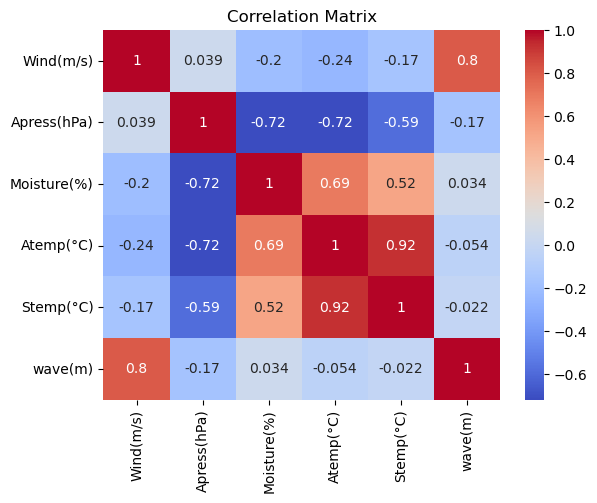

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2016-01-31    12.270968
2016-02-29    11.117241
2016-03-31    12.929032
2016-04-30    14.670000
2016-05-31    16.907692
                ...    
2022-08-31    25.419355
2022-09-30    25.080000
2022-10-31    21.141667
2022-11-30    18.770000
2022-12-31    15.158065
Freq: M, Name: Stemp(°C), Length: 84, dtype: float64

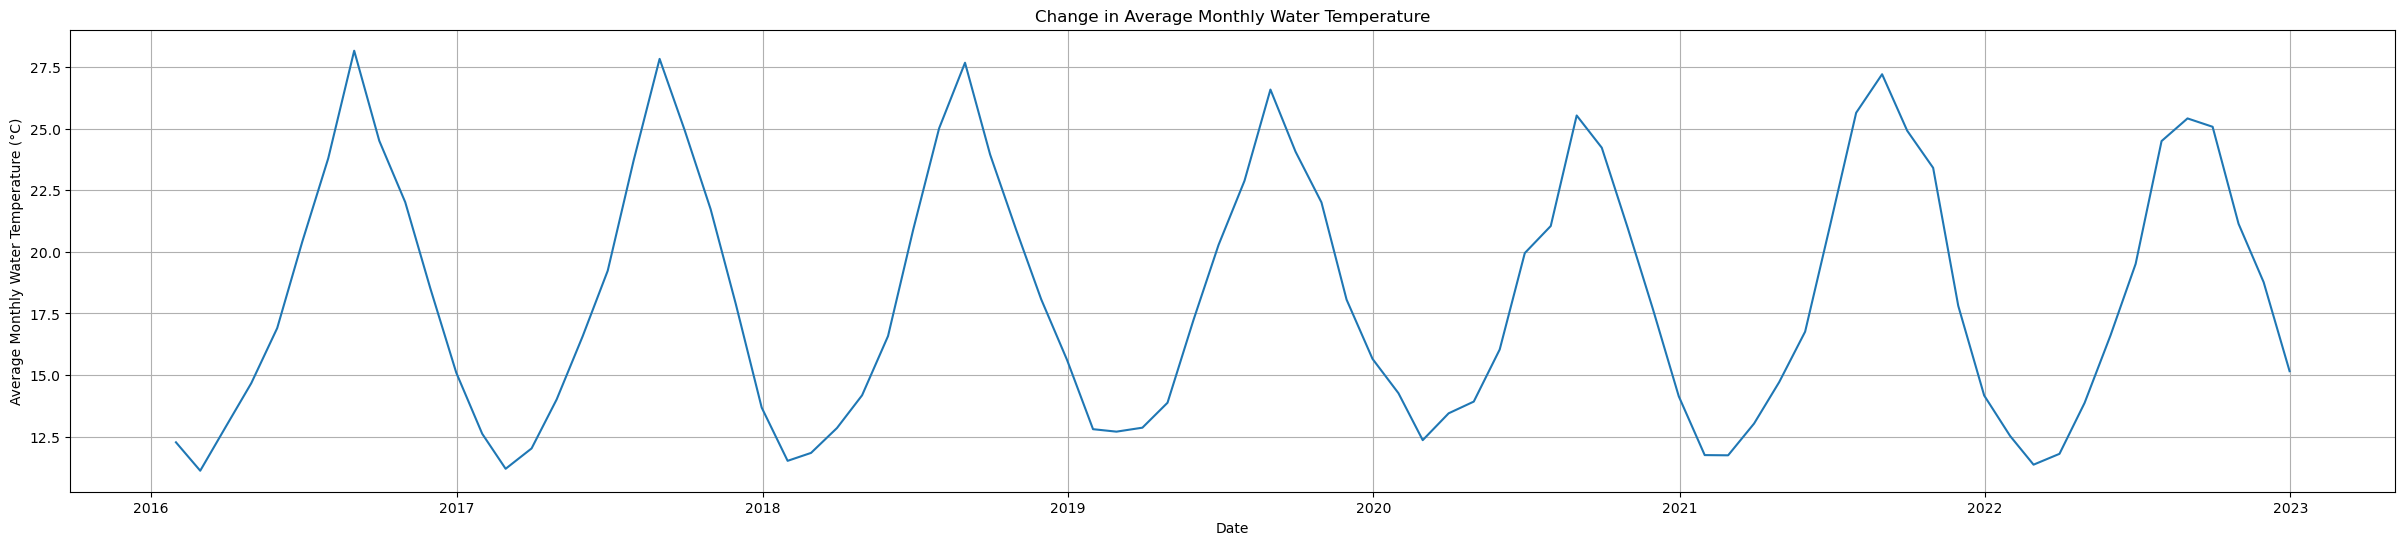

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

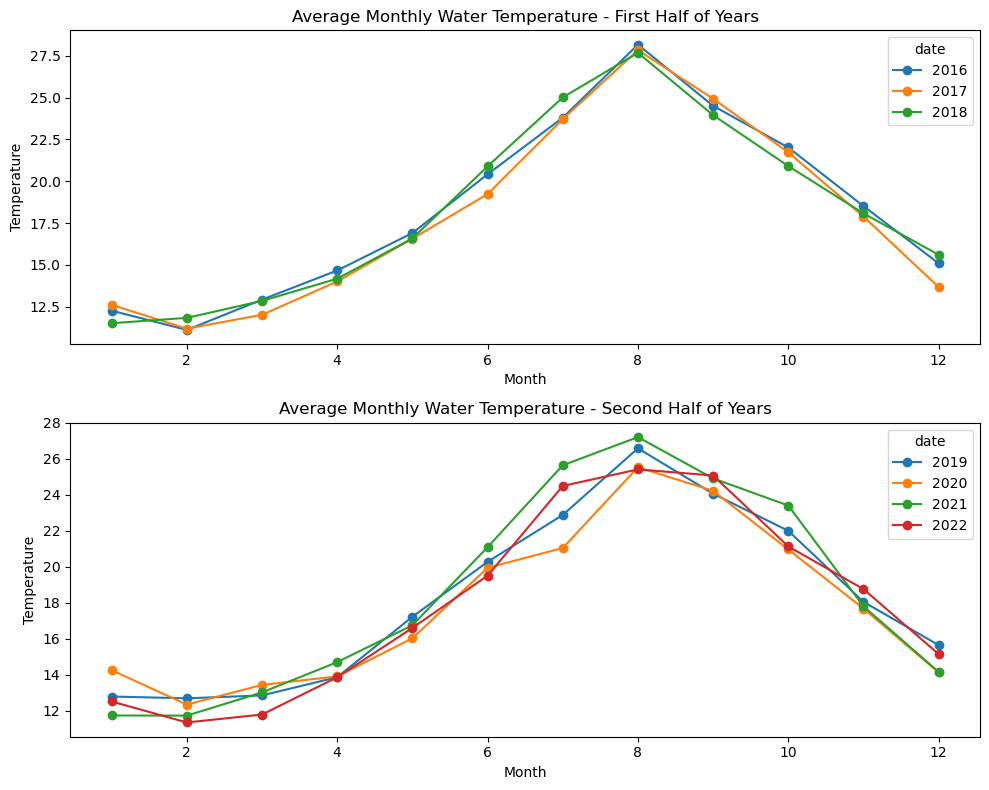

In [11]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


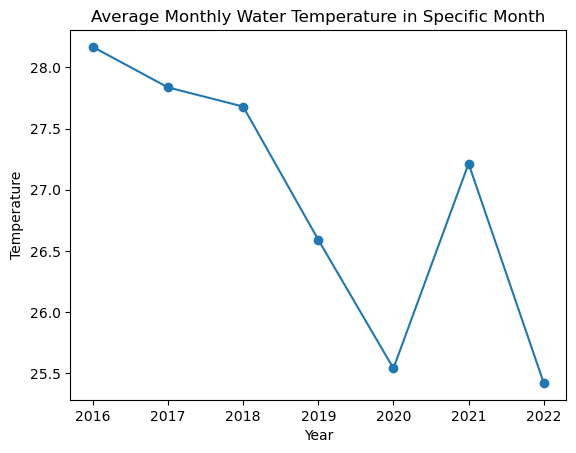

In [23]:
# Define the specific month you want to plot
target_month = 8  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

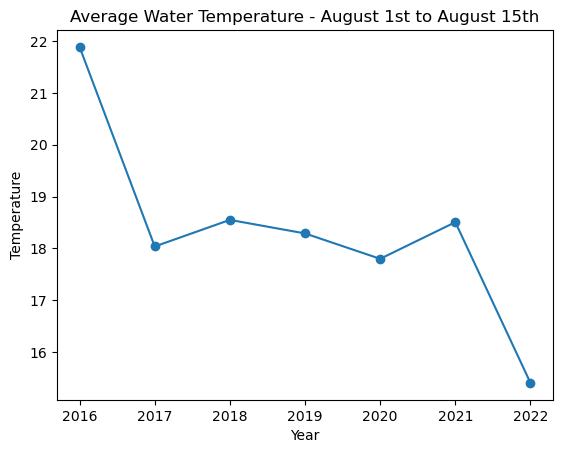

In [28]:

# Define the start and end dates for the range (August 1st to August 15th)
start_date = '2016-08-01'
end_date = '2022-08-15'

# Filter the data for the specified date range
date_range_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by year and calculate the average temperature
yearly_avg_temp = date_range_data.groupby(date_range_data.index.year)['Stemp(°C)'].mean()

# Plot the average water temperature for the specified date range
yearly_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature - August 1st to August 15th')
plt.show()

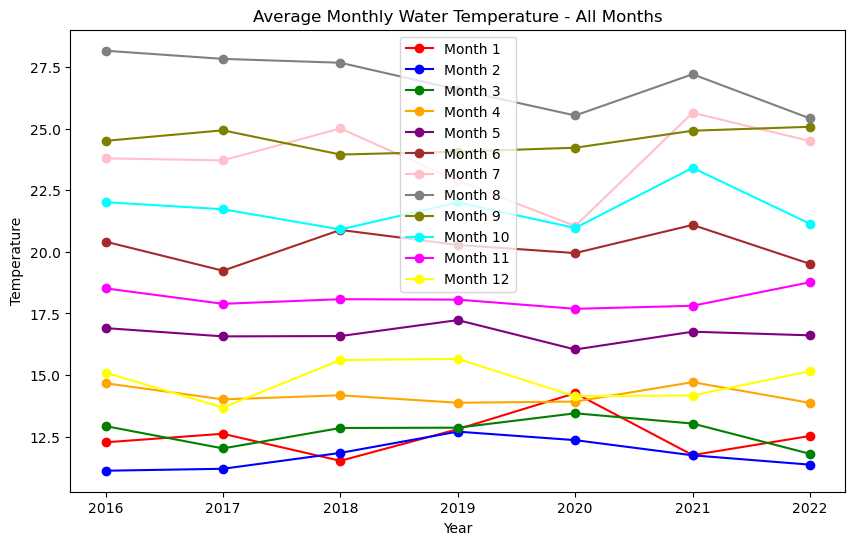

In [14]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


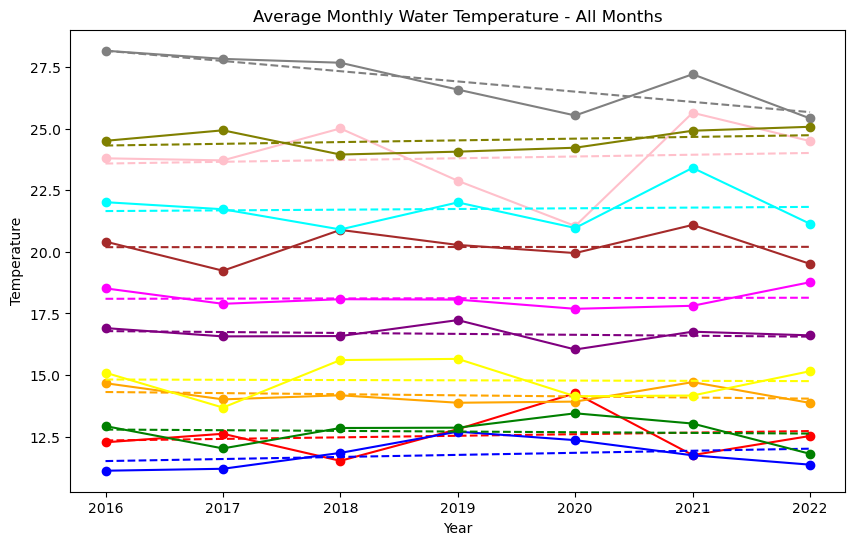

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 2 - Slope: 0.08389414602144707
2. Month 7 - Slope: 0.07154377880184344
3. Month 9 - Slope: 0.06976190476190525
4. Month 1 - Slope: 0.06377164110916886
5. Month 10 - Slope: 0.028182183500592404
6. Month 11 - Slope: 0.007142857142857365
7. Month 6 - Slope: 0.002324829931972448
8. Month 12 - Slope: -0.010878234668557286
9. Month 3 - Slope: -0.027188940092165898
10. Month 5 - Slope: -0.03746012052463688
11. Month 4 - Slope: -0.04488095238095216
12. Month 8 - Slope: -0.4154685099846392


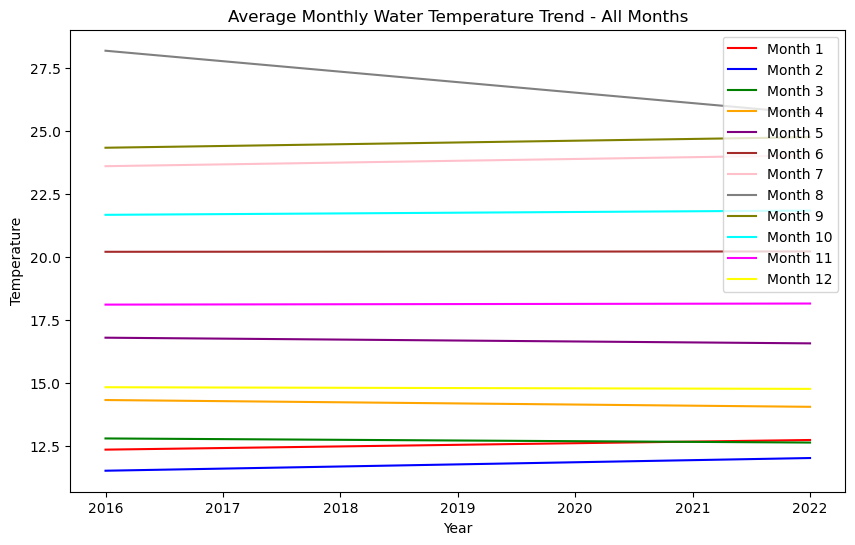

In [16]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_16544\2480682039.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


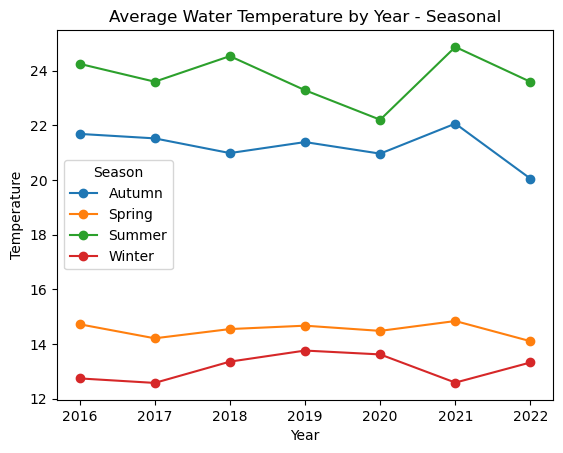

In [17]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16544\3022878532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


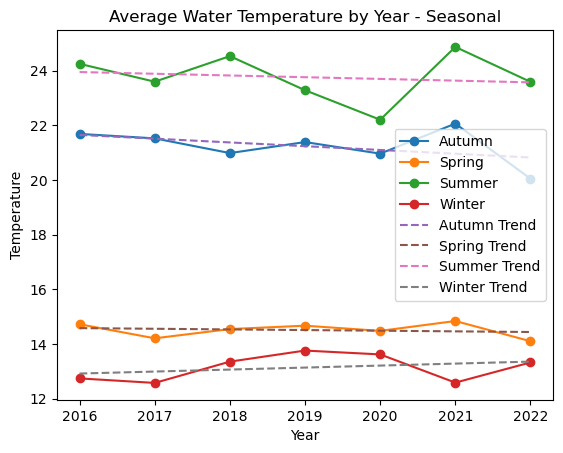

In [18]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Winter - Slope: 0.0728117913832202
2. Spring - Slope: -0.02367075390875993
3. Summer - Slope: -0.06294897001345387
4. Autumn - Slope: -0.13784050443985657


C:\Users\admin\AppData\Local\Temp\ipykernel_16544\930383813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


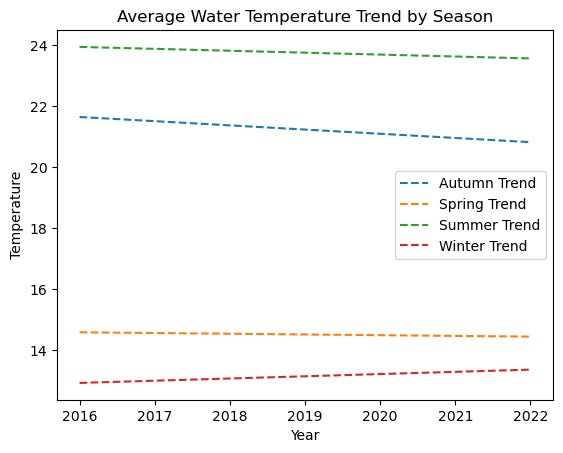

In [19]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
